<a href="https://colab.research.google.com/github/Famous-Amos1/TS-Academy-Capstone-Project/blob/main/Our_Telco_Churn_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Telco Customer Churn**
## **Exploratory Data Analysis (EDA)**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import itertools
import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({
    'figure.dpi'       : 120,
    'font.family'      : 'DejaVu Sans',
    'axes.spines.top'  : False,
    'axes.spines.right': False,
    'axes.grid'        : True,
    'axes.grid.axis'   : 'y',
    'grid.alpha'       : 0.3,
    'grid.linestyle'   : '--',
})

# Colour palette:
CHURN_COLORS = {'No': '#4e79a7', 'Yes': '#e15759'}
PALETTE = ['#4e79a7','#f28e2b','#e15759','#76b7b2','#59a14f',
           '#edc948','#b07aa1','#ff9da7','#9c755f','#bab0ac']


In [15]:
df_raw = pd.read_csv("/content/Telco Customer Churn.csv")

In [16]:
df_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
df_raw.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
578,6522-YRBXD,Male,1,Yes,No,35,Yes,Yes,Fiber optic,Yes,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,94.55,3365.4,No
1647,5442-XSDCW,Male,0,Yes,Yes,11,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),79.50,868.5,Yes
1834,8080-DDEMJ,Male,1,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,45.10,45.1,Yes
4706,6595-COKXZ,Female,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,44.45,44.45,Yes
4219,5176-LDKUH,Female,0,No,No,48,Yes,No,Fiber optic,No,...,No,No,No,No,One year,No,Electronic check,75.15,3772.65,No


In [18]:
df_raw.tail(6)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [19]:
print(f'Shape of the Dataframe           : {df_raw.shape[0]:,} rows  x  {df_raw.shape[1]} columns')

Shape of the Dataframe           : 7,043 rows  x  21 columns


## The column catalogue showing Dtype, Unique,	Missing values,	Sample Values

In [20]:
catalogue = []
for col in df_raw.columns:
    n_unique = df_raw[col].nunique()
    sample   = df_raw[col].dropna().unique()[:3].tolist()
    catalogue.append({
        'Column'  : col,
        'Dtype'   : str(df_raw[col].dtype),
        'Unique'  : n_unique,
        'Missing_Values' : df_raw[col].isna().sum(),
        'Sample_Values': str(sample)
    })
pd.DataFrame(catalogue).set_index('Column')

,Dtype,Unique,Missing_Values,Sample_Values
Column,,,,
customerID,object,7043,0,"['7590-VHVEG', '5575-GNVDE', '3668-QPYBK']"
gender,object,2,0,"['Female', 'Male']"
SeniorCitizen,int64,2,0,"[0, 1]"
Partner,object,2,0,"['Yes', 'No']"
Dependents,object,2,0,"['No', 'Yes']"
tenure,int64,73,0,"[1, 34, 2]"
PhoneService,object,2,0,"['No', 'Yes']"
MultipleLines,object,3,0,"['No phone service', 'No', 'Yes']"
InternetService,object,3,0,"['DSL', 'Fiber optic', 'No']"


In [21]:
df_raw.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [22]:
df_raw.nunique()

,0
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [23]:
df_raw['MonthlyCharges'].value_counts().head(10)

,count
MonthlyCharges,
20.05,61
19.85,45
19.95,44
19.90,44
20.00,43
19.65,43
19.70,43
19.55,40
20.15,40


In [24]:
df_raw['TotalCharges'].value_counts().head(10)

,count
TotalCharges,
,11
20.2,11
19.75,9
20.05,8
19.9,8
19.65,8
19.55,7
45.3,7
20.15,6


## Column classification

In [25]:
column_roles = {
    'Identifier'          : ['customerID'],
    'Target'              : ['Churn'],
    'Numeric (Continuous)': ['MonthlyCharges', 'TotalCharges'],
    'Numeric (Integer)'   : ['tenure', 'SeniorCitizen'],
    'Binary Categorical'  : ['gender','Partner','Dependents','PhoneService','PaperlessBilling'],
    'Multi-class Cat.'    : ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
                             'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                             'Contract','PaymentMethod'],
}
print('Column Classification:')
print('-' * 55)
for role, cols in column_roles.items():
    print(f'  {role:<26}: {cols}')

Column Classification:
-------------------------------------------------------
  Identifier                : ['customerID']
  Target                    : ['Churn']
  Numeric (Continuous)      : ['MonthlyCharges', 'TotalCharges']
  Numeric (Integer)         : ['tenure', 'SeniorCitizen']
  Binary Categorical        : ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
  Multi-class Cat.          : ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


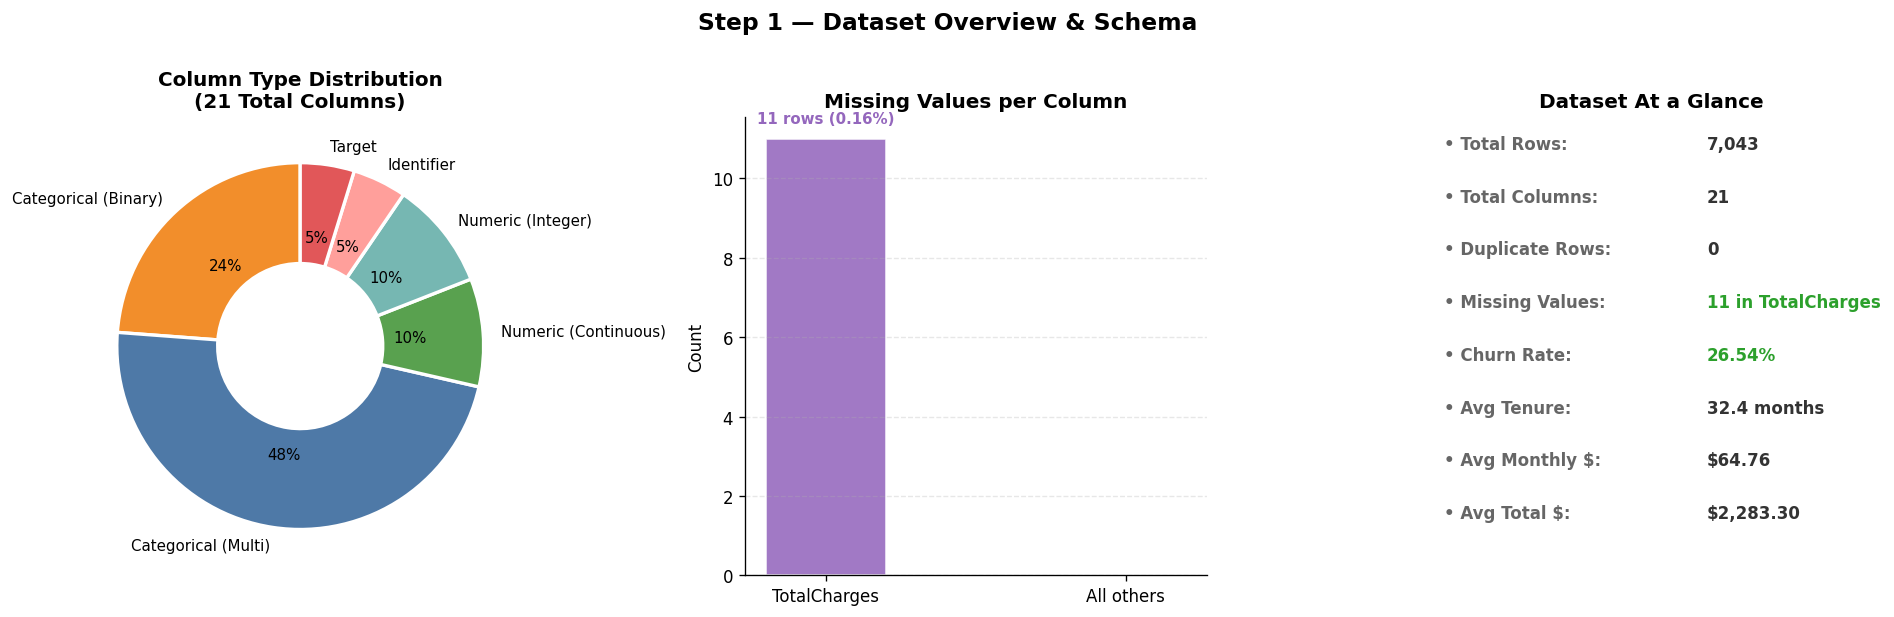

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Column types
type_counts = pd.Series({
    'Categorical (Binary)': 5,
    'Categorical (Multi)' : 10,
    'Numeric (Continuous)': 2,
    'Numeric (Integer)'   : 2,
    'Identifier'          : 1,
    'Target'              : 1,
})
wedge_colors = ['#f28e2b','#4e79a7','#59a14f','#76b7b2','#ff9f9b','#e15759']
wedges, texts, ats = axes[0].pie(
    type_counts, labels=type_counts.index, autopct='%1.0f%%',
    colors=wedge_colors, startangle=90,
    wedgeprops=dict(width=0.55, edgecolor='white', linewidth=2),
    textprops={'fontsize': 9}
)
for at in ats: at.set_fontsize(9)
axes[0].set_title('Column Type Distribution\n(21 Total Columns)', fontweight='bold')

# Missing values
miss = pd.Series({'TotalCharges': 11, 'All others': 0})
axes[1].bar(miss.index, miss.values, color=['#9467bd','#1f77b4'],
            width=0.4, edgecolor='white', alpha=0.88)
axes[1].text(0, 11.4, '11 rows (0.16%)', ha='center', fontsize=9,
              color='#9467bd', fontweight='bold')
axes[1].set_title('Missing Values per Column', fontweight='bold')
axes[1].set_ylabel('Count')

# Stats summary panel
axes[2].axis('off')
stats = [
    ('Total Rows',       f"{df_raw.shape[0]:,}"),
    ('Total Columns',    f"{df_raw.shape[1]}"),
    ('Duplicate Rows',   '0'),
    ('Missing Values',   '11 in TotalCharges'),
    ('Churn Rate',       '26.54%'),
    ('Avg Tenure',       '32.4 months'),
    ('Avg Monthly $',    '$64.76'),
    ('Avg Total $',      '$2,283.30'),
]
y = 0.93
for k, v in stats:
    color = '#2ca02c' if 'Churn' in k or 'Missing' in k else '#333333'
    axes[2].text(0.05, y, f'• {k}:', fontsize=10, fontweight='bold',
                  transform=axes[2].transAxes, color='#666666')
    axes[2].text(0.62, y, v, fontsize=10, fontweight='bold',
                  transform=axes[2].transAxes, color=color)
    y -= 0.115
axes[2].set_title('Dataset At a Glance', fontweight='bold')

plt.suptitle('Step 1 — Dataset Overview & Schema', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [27]:
print('===Data Types ===')
print(df_raw.dtypes)

===Data Types ===
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [28]:
df_raw.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [29]:
df_raw.describe(include=object)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [30]:
# Missing Values
print('===Null Values ===')
df_raw.isnull().sum()

===Null Values ===


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [31]:
# Duplicates
print('===Duplicate Rows ===')
n_dup = df_raw.duplicated().sum()
n_id_dup = df_raw['customerID'].duplicated().sum()
print(f'  Duplicate rows        : {n_dup}')
print(f'  Duplicate customerIDs : {n_id_dup}')
print('  No duplicates found.')

===Duplicate Rows ===
  Duplicate rows        : 0
  Duplicate customerIDs : 0
  No duplicates found.


In [32]:
# Category Consistency
print('===Category Value Inspection ===')
cat_cols = [col for col in df_raw.columns if df_raw[col].dtype == 'object'
            and col not in ['customerID','TotalCharges']]
for col in cat_cols:
    vals = df_raw[col].unique().tolist()
    note = ''
    if 'No internet service' in vals:
        note = '  ← contains "No internet service"'
    if 'No phone service' in vals:
        note = '  ← contains "No phone service"'
    print(f'  {col:<20}: {vals}{note}')

===Category Value Inspection ===
  gender              : ['Female', 'Male']
  Partner             : ['Yes', 'No']
  Dependents          : ['No', 'Yes']
  PhoneService        : ['No', 'Yes']
  MultipleLines       : ['No phone service', 'No', 'Yes']  ← contains "No phone service"
  InternetService     : ['DSL', 'Fiber optic', 'No']
  OnlineSecurity      : ['No', 'Yes', 'No internet service']  ← contains "No internet service"
  OnlineBackup        : ['Yes', 'No', 'No internet service']  ← contains "No internet service"
  DeviceProtection    : ['No', 'Yes', 'No internet service']  ← contains "No internet service"
  TechSupport         : ['No', 'Yes', 'No internet service']  ← contains "No internet service"
  StreamingTV         : ['No', 'Yes', 'No internet service']  ← contains "No internet service"
  StreamingMovies     : ['No', 'Yes', 'No internet service']  ← contains "No internet service"
  Contract            : ['Month-to-month', 'One year', 'Two year']
  PaperlessBilling    : ['Yes',

### **Outlier Check (IQR Method)**



In [33]:
temp = df_raw.copy()
temp['TotalCharges'] = pd.to_numeric(temp['TotalCharges'], errors='coerce')

for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    Q1  = temp[col].quantile(0.25)
    Q3  = temp[col].quantile(0.75)
    IQR = Q3 - Q1
    lo  = Q1 - 1.5 * IQR
    hi  = Q3 + 1.5 * IQR
    n_out = ((temp[col] < lo) | (temp[col] > hi)).sum()
    print(f'  {col:<18}: Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f}')
    print(f'                      Lower fence={lo:.2f}, Upper fence={hi:.2f}')
    print(f'                      Outliers: {n_out}  ')
print('\n  No statistical outliers found in any numeric column.')
print('  The data range (e.g. charges $18–$119/month) is realistic for telecom.')

  tenure            : Q1=9.00, Q3=55.00, IQR=46.00
                      Lower fence=-60.00, Upper fence=124.00
                      Outliers: 0  
  MonthlyCharges    : Q1=35.50, Q3=89.85, IQR=54.35
                      Lower fence=-46.02, Upper fence=171.38
                      Outliers: 0  
  TotalCharges      : Q1=401.45, Q3=3794.74, IQR=3393.29
                      Lower fence=-4688.48, Upper fence=8884.67
                      Outliers: 0  

  No statistical outliers found in any numeric column.
  The data range (e.g. charges $18–$119/month) is realistic for telecom.


##**Data Cleaning**

In [35]:
df = df_raw.copy()
cleaning_log = []

# Let's Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
n_nulls_created = df['TotalCharges'].isna().sum()
cleaning_log.append(f'TotalCharges cast to float64 → {n_nulls_created} NaN created from blank strings')

# FIX 2: Impute missing TotalCharges = 0 for tenure=0 customers
df.loc[df['TotalCharges'].isna(), 'TotalCharges'] = 0.0
cleaning_log.append(f'TotalCharges NaN imputed with 0 (all have tenure=0, no charges yet)')

# FIX 3: Remap SeniorCitizen 0/1 → readable label
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'Non-Senior', 1: 'Senior'})
cleaning_log.append('[SeniorCitizen mapped: 0→"Non-Senior", 1→"Senior"')

# FIX 4: Create binary Churn column for correlations / ML
df['Churn_bin'] = (df['Churn'] == 'Yes').astype(int)
cleaning_log.append('Churn_bin created: Yes→1, No→0')

# FIX 5: Create tenure bins
df['TenureBin'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 24, 36, 48, 60, 72],
    labels=['0-12m','13-24m','25-36m','37-48m','49-60m','61-72m'],
    include_lowest=True
)
cleaning_log.append('TenureBin created: 6 buckets of 12 months each')

# Print cleaning log
print('=== CLEANING LOG ===')
for entry in cleaning_log:
    print(f'  ✅ {entry}')

print(f'\n=== BEFORE ===')
print(f'  Shape: {df_raw.shape}  |  Missing: {df_raw.isnull().sum().sum()}  |  Columns: {df_raw.shape[1]}')
print(f'\n=== AFTER ===')
print(f'  Shape: {df.shape}  |  Missing: {df.isnull().sum().sum()}  |  Columns: {df.shape[1]}')
print(f'  Rows dropped: 0  |  Rows imputed: 11')
print(f'  New columns added: Churn_bin, TenureBin')

=== CLEANING LOG ===
  ✅ TotalCharges cast to float64 → 11 NaN created from blank strings
  ✅ TotalCharges NaN imputed with 0 (all have tenure=0, no charges yet)
  ✅ [SeniorCitizen mapped: 0→"Non-Senior", 1→"Senior"
  ✅ Churn_bin created: Yes→1, No→0
  ✅ TenureBin created: 6 buckets of 12 months each

=== BEFORE ===
  Shape: (7043, 21)  |  Missing: 0  |  Columns: 21

=== AFTER ===
  Shape: (7043, 23)  |  Missing: 0  |  Columns: 23
  Rows dropped: 0  |  Rows imputed: 11
  New columns added: Churn_bin, TenureBin


In [36]:
print('=== CLEAN DATASET VERIFICATION ===')
print(f'Null values remaining  : {df.isnull().sum().sum()}')
print(f'TotalCharges dtype     : {df["TotalCharges"].dtype}')
print(f'SeniorCitizen values   : {df["SeniorCitizen"].unique()}')
print(f'Churn_bin values       : {df["Churn_bin"].unique()}')
print(f'TenureBin categories   : {df["TenureBin"].cat.categories.tolist()}')
print()
df[['tenure','MonthlyCharges','TotalCharges','Churn_bin']].describe().round(2)

=== CLEAN DATASET VERIFICATION ===
Null values remaining  : 0
TotalCharges dtype     : float64
SeniorCitizen values   : ['Non-Senior' 'Senior']
Churn_bin values       : [0 1]
TenureBin categories   : ['0-12m', '13-24m', '25-36m', '37-48m', '49-60m', '61-72m']



,tenure,MonthlyCharges,TotalCharges,Churn_bin
count,7043.00,7043.00,7043.00,7043.00
mean,32.37,64.76,2279.73,0.27
std,24.56,30.09,2266.79,0.44
min,0.00,18.25,0.00,0.00
25%,9.00,35.50,398.55,0.00
50%,29.00,70.35,1394.55,0.00
75%,55.00,89.85,3786.60,1.00
max,72.00,118.75,8684.80,1.00


In [48]:
df.groupby('Churn_bin')['tenure'].mean()

,tenure
Churn_bin,
0,37.569965
1,17.979133


In [42]:
df.groupby('Churn_bin')['MonthlyCharges'].mean()

,MonthlyCharges
Churn_bin,
0,61.265124
1,74.441332


In [43]:
df.groupby('Churn_bin')['TotalCharges'].mean()

,TotalCharges
Churn_bin,
0,2549.911442
1,1531.796094
